In [ ]:
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data  = pd.read_csv('/content/test.csv') 

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data = train_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Ticket']]

In [ ]:
train_data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
Ticket      681
dtype: int64

In [ ]:
train_data['Cabin'].fillna(value = -1, inplace = True)

In [ ]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
Ticket        0
dtype: int64

In [ ]:
data = []
for i in train_data['Cabin'].values:
    if(i!= -1):
        data.append(i[0])
    else:
        data.append(-1)


In [ ]:
train_data['Cabin'] = data

In [ ]:
train_data['Cabin'].value_counts()

-1    687
C      59
B      47
D      33
E      32
A      15
F      13
G       4
T       1
Name: Cabin, dtype: int64

In [ ]:
train_data['Age'].fillna(value = train_data['Age'].mean(), inplace = True)

In [ ]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
Ticket      0
dtype: int64

In [ ]:
train_data['Pclass'][train_data['Cabin'] == -1].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [ ]:
train_data['Cabin'][train_data['Pclass'] == 3].value_counts()

-1    479
F       5
G       4
E       3
Name: Cabin, dtype: int64

In [ ]:
train_data['Cabin'][train_data['Pclass'] == 2].value_counts()

-1    168
F       8
D       4
E       4
Name: Cabin, dtype: int64

In [ ]:
train_data['Cabin'][train_data['Pclass'] == 1].value_counts()

C     59
B     47
-1    40
D     29
E     25
A     15
T      1
Name: Cabin, dtype: int64

In [ ]:
train_data['Ticket'][train_data['Pclass'] == 3].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
347088      6
           ..
349233      1
349236      1
370373      1
349206      1
370376      1
Name: Ticket, Length: 394, dtype: int64

In [ ]:
tickets_3rd = np.unique(train_data['Ticket'][train_data['Cabin'] == 3].values)

In [ ]:
tickets_2nd = np.unique(train_data['Ticket'][train_data['Pclass'] == 2].values)

In [ ]:
tickets_1st = np.unique(train_data['Ticket'][train_data['Pclass'] == 1].values)

In [ ]:
np.intersect1d(tickets_2nd, tickets_3rd)

array([], dtype=object)

In [ ]:
train_data = train_data.drop(columns= ['Cabin', 'Ticket'])

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


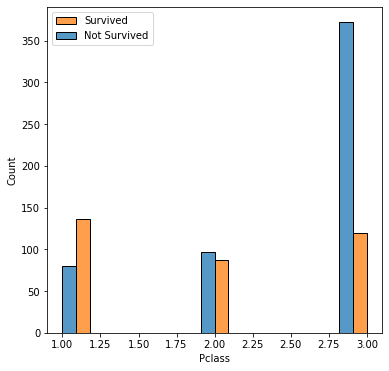

In [ ]:
#Number of passenger in a particular class who survived 

plt.figure(figsize=(6,6))
r=sns.histplot(data=train_data,x='Pclass',hue='Survived',multiple='dodge')
r.legend(labels=['Survived','Not Survived'])

In [ ]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train_data['Embarked'].fillna(value = 'S', inplace = True)

In [ ]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
test_data = test_data[[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]

In [ ]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
le_2 = LabelEncoder()
train_data['Embarked'] = le_2.fit_transform(train_data['Embarked'])

In [ ]:
test_data['Sex'] = le.transform(test_data['Sex'])
test_data['Embarked'] = le_2.transform(test_data['Embarked'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test_data['Age'].fillna(value = test_data['Age'].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
test_data['Fare'].fillna(value = test_data['Fare'].mean(), inplace = True)

In [ ]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
train_data.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [ ]:
y_train = train_data['Survived']

In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data['Fare'] = sc.fit_transform(train_data['Fare'].values.reshape(-1,1))
sc_2 = StandardScaler()
train_data['Age'] = sc_2.fit_transform(train_data['Age'].values.reshape(-1, 1))

test_data['Fare'] = sc.transform(test_data['Fare'].values.reshape(-1, 1))
test_data['Age'] = sc_2.transform(test_data['Age'].values.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohot = OneHotEncoder()
hot_embarked = ohot.fit_transform(train_data['Embarked'].values.reshape(-1, 1)).toarray()
ohot_2 = OneHotEncoder()
hot_Pclass = ohot_2.fit_transform(train_data['Pclass'].values.reshape(-1, 1)).toarray()

In [ ]:
hot_embarked

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
train_data = train_data.drop(columns = ['Embarked', 'Pclass'])

In [ ]:
train_data = pd.concat([train_data, pd.DataFrame(hot_embarked)], axis =1)

In [ ]:
train_data = pd.concat([train_data, pd.DataFrame(hot_Pclass)], axis = 1)

In [ ]:
train_data

,Survived,Sex,Age,SibSp,Parch,Fare,0,1,2,0,1,2
0,0,1,-0.592481,1,0,-0.502445,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,0.638789,1,0,0.786845,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,-0.284663,0,0,-0.488854,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,0.407926,1,0,0.420730,0.0,0.0,1.0,1.0,0.0,0.0
4,0,1,0.407926,0,0,-0.486337,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,-0.207709,0,0,-0.386671,0.0,0.0,1.0,0.0,1.0,0.0
887,1,0,-0.823344,0,0,-0.044381,0.0,0.0,1.0,1.0,0.0,0.0
888,0,0,0.000000,1,2,-0.176263,0.0,0.0,1.0,0.0,0.0,1.0
889,1,1,-0.284663,0,0,-0.044381,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
x_train = train_data.drop('Survived', axis = 1).values

In [ ]:
x_test = test_data.values

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1000000)
model.fit(x_train, y_train)

LogisticRegression(C=1000000)

In [ ]:
model.score(x_train, y_train)

0.8035914702581369

In [ ]:
from sklearn.svm import SVC
model_2 = SVC()
model_2.fit(x_train, y_train)

SVC()

In [ ]:
model_2.score(x_train, y_train)

0.8361391694725028